#### Draw the Histogram using seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

visa_df = pd.read_csv(f"visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [2]:
num_cols = visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

#### Box plot

- Box plot is used to identify the outliers
- Outlier is an observation having huge positive value or huge negative value
- Q1 = 25p, Q2=50P, Q3 = 75P
- IQR = Inter Quartile Range = Q3-Q1
- OUtliers = Q3+1.5*IQR and Q1-1.5*IQR

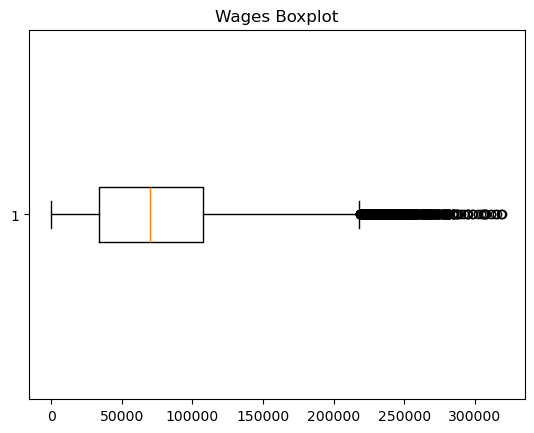

In [6]:
# Boxplot using matplotlib: plt.boxplot()
wage_data = visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Wages Boxplot')
plt.show()

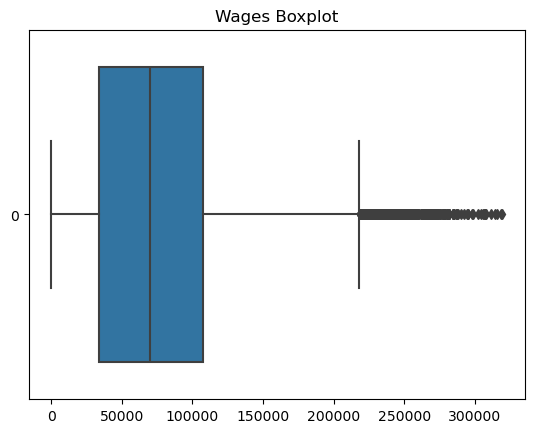

In [21]:
# Boxplot using seaborn: 
wage_data = visa_df['prevailing_wage']
sbn.boxplot(wage_data,orient='h')
plt.title('Wages Boxplot')
plt.show()

Text(0.5, 1.0, 'Box plot')

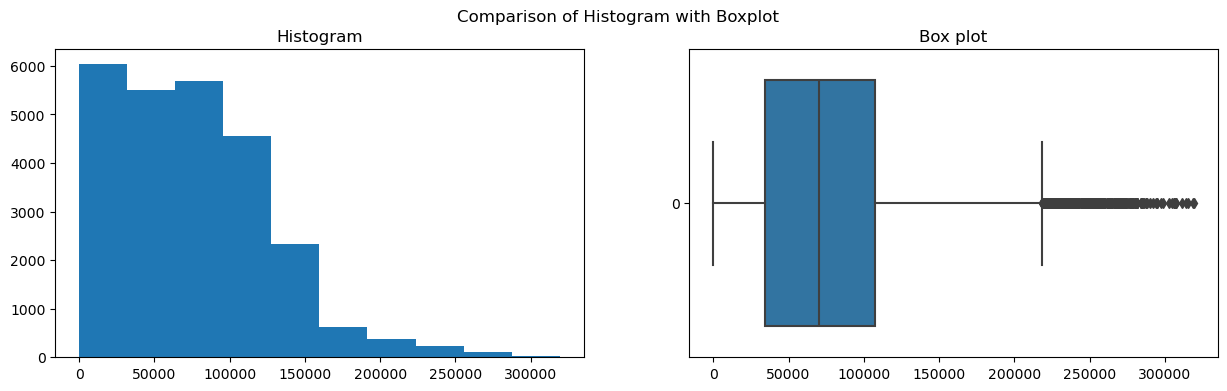

In [9]:
# Plot the distribution plot (Histogram) and Boxplot side by side
wage_data = visa_df['prevailing_wage']
plt.figure(figsize=(15,4))
plt.suptitle("Comparison of Histogram with Boxplot")
plt.subplot(1,2,1)
plt.hist(wage_data)
plt.title("Histogram")
plt.subplot(1,2,2)
sbn.boxplot(wage_data,orient='h')
plt.title("Box plot")

Text(0.5, 1.0, 'Box plot')

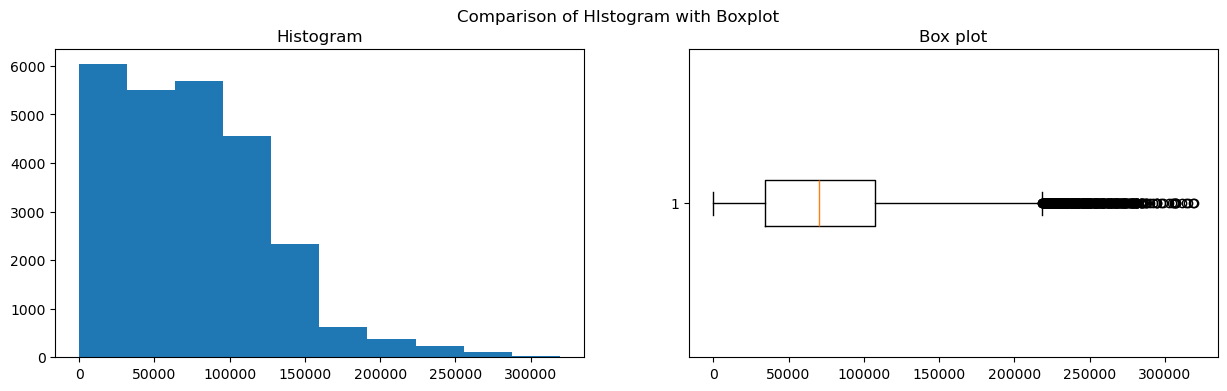

In [10]:
# Plot the distribution plot (Histogram) and Boxplot side by side
wage_data = visa_df['prevailing_wage']
plt.figure(figsize=(15,4))
plt.suptitle("Comparison of HIstogram with Boxplot")
plt.subplot(1,2,1).hist(wage_data)
plt.title("Histogram")
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.title("Box plot")

In [14]:
# Find the outliers in prevailing_wage data
wage_data = visa_df['prevailing_wage']
q1 = round(np.percentile(wage_data,25),2)
q3 = round(np.percentile(wage_data,75),2)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
print(lb,ub)
cond1 = wage_data<lb
cond2 = wage_data>ub
cond3 = cond1|cond2
print(f"Lower outliers count = {len(visa_df[cond1])}, Upper outliers count = {len(visa_df[cond2])}")
outliers_wage = wage_data[cond3]
print("Outliers for Wages data".center(55,"="))
outliers_wage

-76564.565 218315.555
Lower outliers count = 0, Upper outliers count = 427
================Outliers for Wages data================


14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [15]:
outliers_data = visa_df[cond3]
print("Visa data with Outliers of wages".center(55,"="))
outliers_data

============Visa data with Outliers of wages===========


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


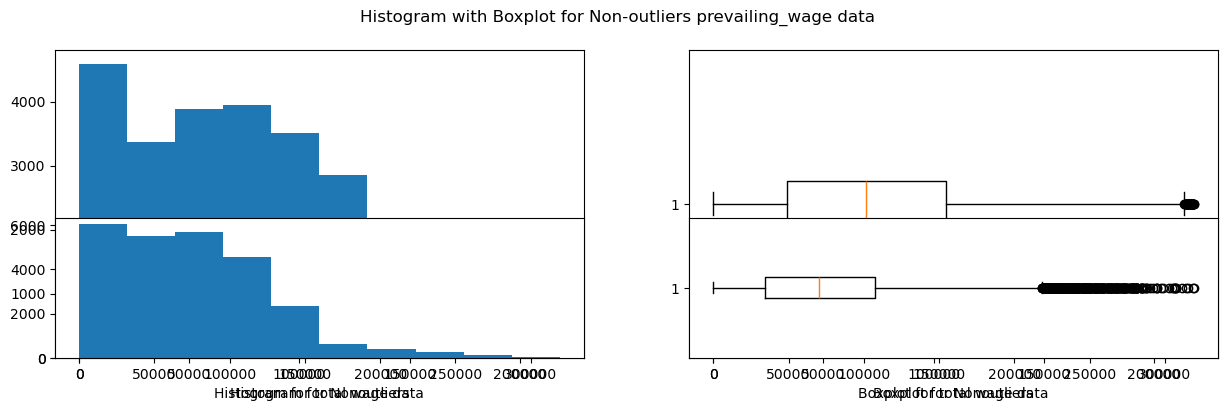

In [27]:
# Get the non-outliers DataFrame from wage. And draw the boxplot
wage_data = visa_df['prevailing_wage']
q1 = np.percentile(wage_data,25)
q3 = np.percentile(wage_data,75)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr
cond1 = wage_data>lb
cond2 = wage_data<ub
cond3 = cond1&cond2
non_outliers_wage = wage_data[cond3]

non_outliers = visa_df[cond3]
non_outlier_data=non_outliers['prevailing_wage']

plt.figure(figsize=(15,4))
plt.suptitle("Histogram with Boxplot for Non-outliers prevailing_wage data")
plt.subplot(1,2,1).hist(non_outliers_wage)
plt.xlabel("Histogram for Nonoutliers")
plt.subplot(1,2,2).boxplot(non_outliers_wage,vert=False)
plt.xlabel("Boxplot for Nonoutliers")

plt.subplot(2,2,3).hist(wage_data)
plt.xlabel("Histogram for total wage data")
# plt.title("Histogram with Boxplot for Non-outliers wages in Visa data")
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel("Boxplot for total wage data")
plt.show()

Lower outliers count = 0, Upper outliers count = 427
outliers_wage count = 427
Median wage = 70308.20999999999


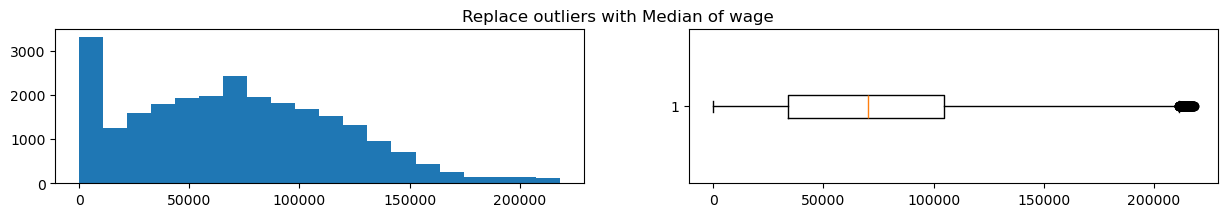

In [29]:
# Fill the outliers of wage data with wage median
# 427 outliers are there
# 427 should replace with median
# Draw plot for median

visa_df = pd.read_csv(f"visadataset.csv")
wage_data = visa_df['prevailing_wage']
q1 = round(np.percentile(wage_data,25),2)
q3 = round(np.percentile(wage_data,75),2)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr

cond1 = wage_data<lb
cond2 = wage_data>ub
cond3 = cond1|cond2
print(f"Lower outliers count = {len(visa_df[cond1])}, Upper outliers count = {len(visa_df[cond2])}")
outliers_wage = wage_data[cond3]
print(f"outliers_wage count = {len(outliers_wage)}")
median_wage = np.median(visa_df['prevailing_wage'])
print(f"Median wage = {median_wage}")

# visa_df["prevailing_wage"] = visa_df["prevailing_wage"].mask(visa_df["prevailing_wage"]>=ub, median_wage)   # (Or)
visa_df["prevailing_wage"].mask(cond3, median_wage,inplace=True)

# plt.figure(figsize=(10,2))
# plt.hist(visa_df['prevailing_wage'])
# plt.show()

plt.figure(figsize=(15,2))
plt.suptitle("Replace outliers with Median of wage")
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'],bins=20)

plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

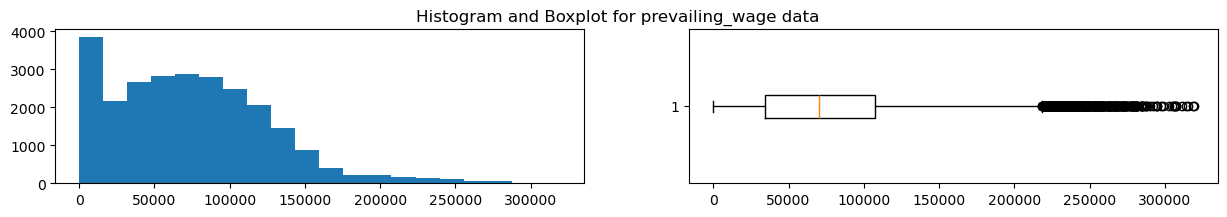

In [30]:
visa_df = pd.read_csv(f"visadataset.csv")
wage_data = visa_df['prevailing_wage']
plt.figure(figsize=(15,2))
plt.suptitle("Histogram and Boxplot for prevailing_wage data")
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)

plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.show()

NOn-outliers count = 25053


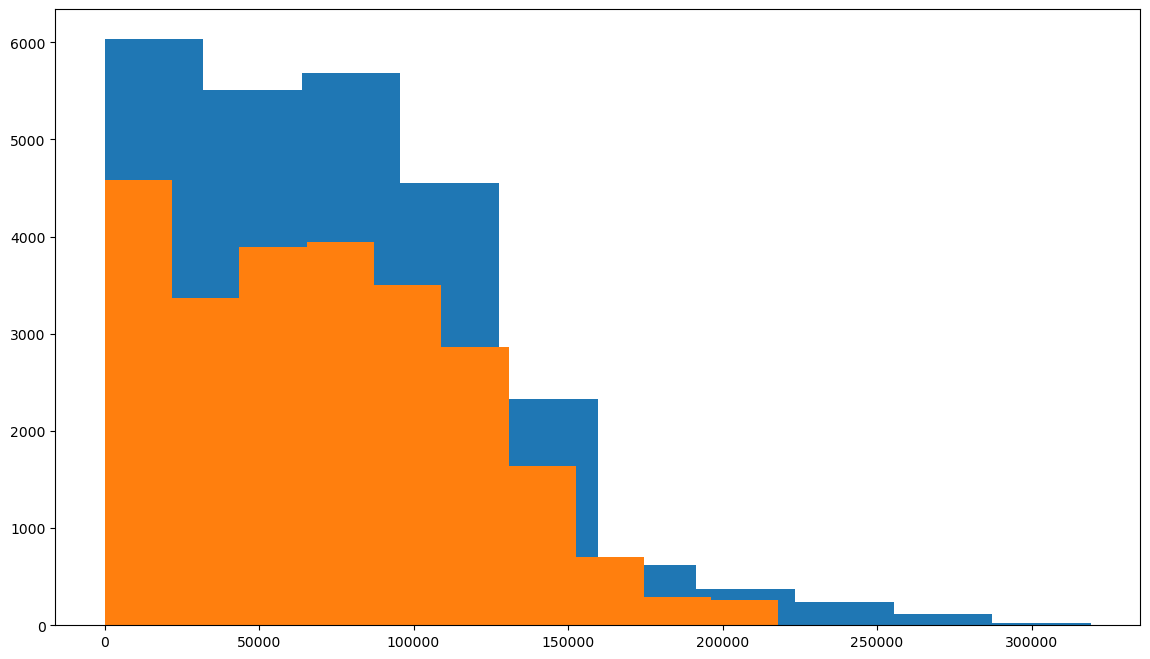

In [36]:
# Get non-outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

visa_df = pd.read_csv(f"Visadataset.csv")
num_cols = visa_df.select_dtypes(exclude='object').columns

wage_data = visa_df['prevailing_wage']
q1 = round(np.percentile(wage_data,25),2)
q3 = round(np.percentile(wage_data,75),2)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr

cond1 = wage_data>lb
cond2 = wage_data<ub
cond3 = cond1&cond2
non_outliers_df = visa_df[cond3]
print(f"NOn-outliers count = {len(non_outliers_df)}")

wage_data_non_outliers = non_outliers_df['prevailing_wage']

plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

#### Deal with outliers

- Method1: We can drop the outliers.
  - Dropping outliers is an easy way, but not recommended way.
  - If we drop the outliers, rows will be dropped. So, other column's data also will be dropped.
  - Some important information might get lost from other columns
  - BUt in industry, outliers will be dropped if outliers percentage is less than 2%.
  - Ex: NUmber of outliers = 427. Total observations = 25480. Then outlier percentage = 1.675%. 1.675%<2%
- Method2: Fill outliers with Median value
  - We already know that outliers will not be effected by Median
  - So it's the best practise to fill outliers with Median
- Method3: Capping or Flooring:
  - INstead of filling outliers with Median, we can fill with certain value.
  - Ex: Outliers which are less than lb - fill with lb value
  -     Outliers which are more than ub - fill with ub value

**** Isolation FOrest *****
- It is an ML model used to find the outliers and anamolies

Lower outliers count = 0, Upper outliers count = 427
outliers_wage count = 427
Median wage = 70308.20999999999


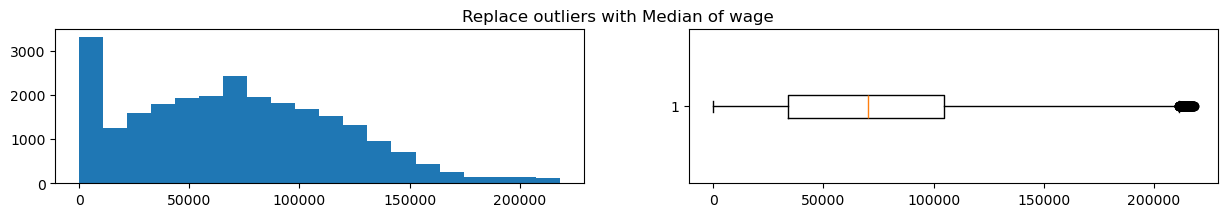

In [21]:
# Fill the outliers of wage data with wage median
# 427 outliers are there
# 427 should replace with median
# Draw plot for median

visa_df = pd.read_csv(f"visadataset.csv")
wage_data = visa_df['prevailing_wage']
q1 = round(np.percentile(wage_data,25),2)
q3 = round(np.percentile(wage_data,75),2)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr

cond1 = wage_data<lb
cond2 = wage_data>ub
cond3 = cond1|cond2
print(f"Lower outliers count = {len(visa_df[cond1])}, Upper outliers count = {len(visa_df[cond2])}")
outliers_wage = wage_data[cond3]
print(f"outliers_wage count = {len(outliers_wage)}")
median_wage = np.median(visa_df['prevailing_wage'])
print(f"Median wage = {median_wage}")

visa_df["prevailing_wage"] = visa_df["prevailing_wage"].mask(visa_df["prevailing_wage"]>=ub, median_wage)
visa_df["prevailing_wage"] = visa_df["prevailing_wage"].mask(visa_df["prevailing_wage"]<=lb, median_wage)

plt.figure(figsize=(15,2))
plt.suptitle("Replace outliers with Median of wage")
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'],bins=20)

plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

#### np.where()

- In  numpy package, we have where()
- It takes 3 arguments:
  - condition
  - value if condition is True
  - value if condition is False
- It is applicable only for binary data
  

In [39]:
# Replace outliers with median value
wage_data = visa_df['prevailing_wage']
list1 = []
for v in wage_data:
    if v<lb or v>ub:
        list1.append(median_wage)
    else:
        list1.append(v)

In [26]:
dict1 = {'Subj':['DS','DE','CS'],
              'Marks':[100,200,300]}
dict1_df = pd.DataFrame(dict1)
dict1_df

,Subj,Marks
0,DS,100
1,DE,200
2,CS,300


In [30]:
# Replace marks with 1, which are greater than 100 in above Dataframe (dict1_df)
marks_data = dict1_df['Marks']
list1 = []
for v in marks_data:
    if v>100:
        list1.append('1')
    else:
        list1.append(v)
dict1_df['Marks'] = list1
dict1_df

,Subj,Marks
0,DS,100
1,DE,1
2,CS,1


In [35]:
# Replace marks with 1, which are greater than 100 in above Dataframe (dict1_df) using np.where()

dict1 = {'Subj':['DS','DE','CS'],
              'Marks':[100,200,300]}
dict1_df = pd.DataFrame(dict1)
cond = dict1_df['Marks']>100
list1 = np.where(cond, 1, dict1_df['Marks'])
dict1_df['Marks'] = list1
dict1_df

,Subj,Marks
0,DS,100
1,DE,1
2,CS,1


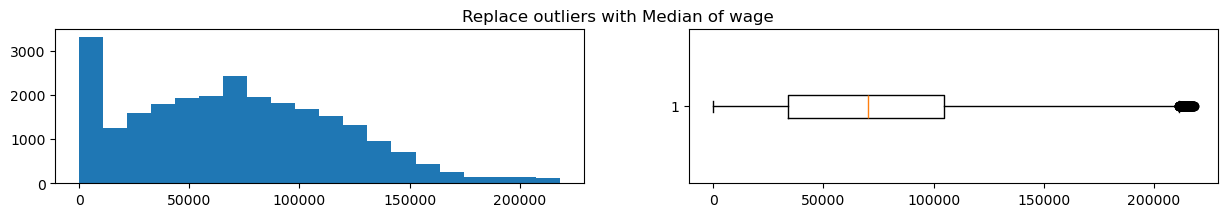

In [43]:
# Fill the outliers of wage data with wage median using np.where()
# 427 outliers are there
# 427 should replace with median
# Draw plot for median

visa_df = pd.read_csv(f"visadataset.csv")
wage_data = visa_df['prevailing_wage']
q1 = round(np.percentile(wage_data,25),2)
q3 = round(np.percentile(wage_data,75),2)
iqr = q3-q1
lb = q1-1.5*iqr
ub = q3+1.5*iqr

cond1 = wage_data<lb
cond2 = wage_data>ub
cond3 = cond1|cond2
median_wage = np.median(visa_df['prevailing_wage'])

wage_list_new = np.where(cond3,median_wage,wage_data)
visa_df["prevailing_wage"] = wage_list_new

plt.figure(figsize=(15,2))
plt.suptitle("Replace outliers with Median of wage")
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'],bins=20)

plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()